In [1]:
import pandas as pd
import os

In [2]:
# Adjusting the folder and file (using raw string)
# Warning: dir() is a bult in function in Python
tdir = r"C:\Users\henri\OneDrive\Documentos\Henrique\Trabalho\Python\Pandas\Tutoriais"
file = "HistoricalQuotes_Amazon_1Y_no_dates.csv"
ffile = tdir + "\\" + file

In [3]:
print(ffile)

C:\Users\henri\OneDrive\Documentos\Henrique\Trabalho\Python\Pandas\Tutoriais\HistoricalQuotes_Amazon_1Y_no_dates.csv


In [4]:
df = pd.read_csv(ffile)
df.head(5)

,Close,Open,High,Low,Volume
0,1883.75,1814.63,1889.76,1811.13,9493797
1,1884.30,1934.38,1975.00,1882.76,8143993
2,1979.59,1970.28,2014.67,1960.45,5240402
3,1972.74,2026.42,2034.60,1958.42,6219094
4,2009.29,2003.18,2039.30,1987.97,6546997


In [22]:
# The command [::-1] was used in order to create the range from latest to the oldest data as initial data
rng = pd.date_range(start="3/14/2019", end="2/28/2020", freq="B")#[::-1]
rng

# Caso se saiba somente a data inicial e o número de períodos:
#rng1 = pd.date_range(start='3/14/2019', periods=252, freq='B')
#rng1

DatetimeIndex(['2019-03-14', '2019-03-15', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25',
               '2019-03-26', '2019-03-27',
               ...
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', length=252, freq='B')

In [6]:
df.set_index(rng, inplace=True)

In [7]:
df.head()

,Close,Open,High,Low,Volume
2019-03-14,1883.75,1814.63,1889.76,1811.13,9493797
2019-03-15,1884.30,1934.38,1975.00,1882.76,8143993
2019-03-18,1979.59,1970.28,2014.67,1960.45,5240402
2019-03-19,1972.74,2026.42,2034.60,1958.42,6219094
2019-03-20,2009.29,2003.18,2039.30,1987.97,6546997


In [8]:
df.columns

Index([' Close', ' Open', ' High', ' Low', ' Volume'], dtype='object')

In [9]:
df = df.rename(columns=lambda x: str(x).strip())
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume'], dtype='object')

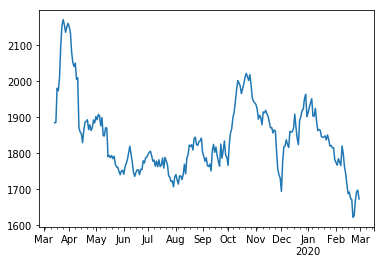

In [10]:
%matplotlib inline
df.Close.plot()

In [16]:
#df["2020-02"]

In [12]:
#df["2020-02-10":"2020-02-03"].High
df["2020-02-03":"2020-02-10"].High

2020-02-03    1777.93
2020-02-04    1787.50
2020-02-05    1805.77
2020-02-06    1782.68
2020-02-07    1818.98
2020-02-10    1823.75
Freq: B, Name: High, dtype: float64

In [13]:
#df["2020-02-10":"2020-02-03"].High.mean()
df["2020-02-03":"2020-02-10"].High.mean()

1799.4350000000002

In [17]:
df.asfreq('M', method='pad') #Não funciona se o range estiver invertido
# A frequencia pode ser weekly, daily, hour ver:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

,Close,Open,High,Low,Volume
2019-03-31,2160.00,2163.20,2180.25,2155.29,3334264
2019-04-30,1883.16,1905.37,1906.94,1880.00,2856959
2019-05-31,1751.60,1751.20,1754.40,1740.13,3119979
2019-06-30,1788.20,1803.76,1805.90,1783.48,2651086
2019-07-31,1732.66,1731.63,1747.83,1723.70,2187598
2019-08-31,1840.72,1821.95,1842.00,1815.58,3325189
2019-09-30,1787.83,1792.23,1793.77,1753.40,5070258
2019-10-31,1939.00,1935.89,1941.59,1930.50,1690294
2019-11-30,1729.56,1699.24,1730.82,1680.89,5679121
2019-12-31,1900.82,1913.33,1921.55,1881.87,3962915


In [21]:
df["2020-02"].asfreq('D', method='pad') #Observe que ele completa os finais de semana

,Close,Open,High,Low,Volume
2020-02-03,1773.42,1770.00,1777.93,1753.47,3030860
2020-02-04,1765.70,1784.13,1787.50,1745.68,4316646
2020-02-05,1783.76,1793.00,1805.77,1773.36,4848654
2020-02-06,1774.26,1757.79,1782.68,1747.50,5098182
2020-02-07,1764.77,1810.17,1818.98,1763.11,6347858
2020-02-08,1764.77,1810.17,1818.98,1763.11,6347858
2020-02-09,1764.77,1810.17,1818.98,1763.11,6347858
2020-02-10,1819.26,1796.26,1823.75,1787.28,5740075
2020-02-11,1797.27,1769.94,1799.50,1767.03,6153806
2020-02-12,1761.85,1753.51,1784.16,1753.51,6339232
